**Name: EDUARDO WILLIAMS C.**

**Student Code: C0896405**

**Date: June 6, 2024**

In [262]:
# importing libraries
import pandas  as pd
import numpy   as np
import seaborn as sns
import joblib

from matplotlib              import pyplot as plt
from sklearn.metrics         import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model    import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing   import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [263]:
# loading the dataset
df = pd.read_csv("Algerian_forest_fires_cleaned.csv")

**DATA WRANGLING**

In [264]:
# identifying columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [265]:
# checking out the data
df.head(100)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,9,2012,29,73,17,0.1,68.4,1.9,15.7,1.4,2.9,0.5,not fire,0
96,5,9,2012,29,75,16,0.0,80.8,3.4,24.0,2.8,5.1,1.7,fire,0
97,6,9,2012,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0.9,not fire,0
98,7,9,2012,31,71,17,0.3,69.6,3.2,30.1,1.5,5.1,0.6,not fire,0


In [266]:
# verifying shape
df.shape

(243, 15)

In [267]:
# removing duplicate rows
df.drop_duplicates(keep='first', inplace=True)

In [268]:
# verifying year column
df['year'].unique()

array([2012], dtype=int64)

In [269]:
# deleting year column since it contain the same value for whole dataset
df.drop('year', axis=1, inplace=True)

In [270]:
# looking for null values
df.isna().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [271]:
# verifying new shape
df.shape

(243, 14)

**ENCODING**

In [272]:
# verifying classes column
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [273]:
# deleting blank spaces
df['Classes'] = df['Classes'].str.strip()

In [274]:
# verifying classes column
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [275]:
# encoding Classes column
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0}).astype(int)

In [276]:
# checking out new data
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [277]:
# converting datatypes
df['day']         = df['day'].astype('float64')
df['month']       = df['month'].astype('float64')
df['Temperature'] = df['Temperature'].astype('float64')
df['RH']          = df['RH'].astype('float64')
df['Ws']          = df['Ws'].astype('float64')
df['Classes']     = df['Classes'].astype('float64')
df['Region']      = df['Region'].astype('float64')

In [278]:
# verifying the new dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   Temperature  243 non-null    float64
 3   RH           243 non-null    float64
 4   Ws           243 non-null    float64
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      243 non-null    float64
 13  Region       243 non-null    float64
dtypes: float64(14)
memory usage: 26.7 KB


**DATA VISUALIZATION**

In [279]:
# correlation table
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197


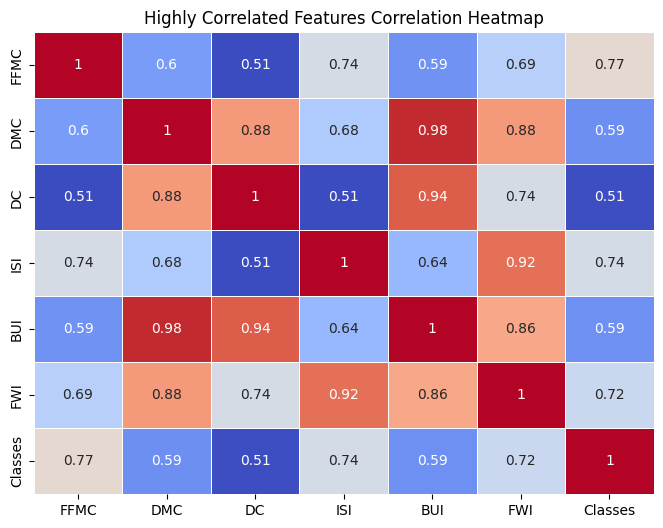

In [280]:
# finding highly correlated features
high_corr = df.corr()

# Setting a threshold value (70&)
threshold = 0.7

# Creating a mask to retain highly correlated variables
mask = (high_corr > threshold) | (high_corr < -threshold)

# Masking the ones above the diagonal (the ones below the diagonal are automatically masked)
mask = mask & ~np.eye(mask.shape[0], dtype=bool)

# Getting the names of variables that have high correlations
selected_features = high_corr.columns[mask.any()].tolist()

# Creating a heatmap containing only highly correlated variables and display correlation values
subset_corr = high_corr.loc[selected_features, selected_features]

# Create and display the subset heatmap with correlation values
plt.figure(figsize=(8, 6))
sns.heatmap(subset_corr, annot=True, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Highly Correlated Features Correlation Heatmap')
plt.show()

In [281]:
# DMC and DC  have a high correlation among them
# DMC and BUI have a high correlation among them
# DC  and BUI have a high correlation among them

# removing redundant features (DC and BUI columns), since DMC has the highest correlation with the target column (FWI)
df.drop('DC',  axis=1, inplace=True)
df.drop('BUI', axis=1, inplace=True)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   Temperature  243 non-null    float64
 3   RH           243 non-null    float64
 4   Ws           243 non-null    float64
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   ISI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    float64
 11  Region       243 non-null    float64
dtypes: float64(12)
memory usage: 22.9 KB


In [283]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Classes,Region
0,1.0,6.0,29.0,57.0,18.0,0.0,65.7,3.4,1.3,0.5,0.0,0.0
1,2.0,6.0,29.0,61.0,13.0,1.3,64.4,4.1,1.0,0.4,0.0,0.0
2,3.0,6.0,26.0,82.0,22.0,13.1,47.1,2.5,0.3,0.1,0.0,0.0
3,4.0,6.0,25.0,89.0,13.0,2.5,28.6,1.3,0.0,0.0,0.0,0.0
4,5.0,6.0,27.0,77.0,16.0,0.0,64.8,3.0,1.2,0.5,0.0,0.0


In [284]:
df.shape

(243, 12)

**TRAIN AND TEST DATASETS**

In [285]:
# defining features and target variable
X = df.drop('FWI', axis=1)
Y = df['FWI']

In [286]:
X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,1.0,6.0,29.0,57.0,18.0,0.0,65.7,3.4,1.3,0.0,0.0
1,2.0,6.0,29.0,61.0,13.0,1.3,64.4,4.1,1.0,0.0,0.0
2,3.0,6.0,26.0,82.0,22.0,13.1,47.1,2.5,0.3,0.0,0.0
3,4.0,6.0,25.0,89.0,13.0,2.5,28.6,1.3,0.0,0.0,0.0
4,5.0,6.0,27.0,77.0,16.0,0.0,64.8,3.0,1.2,0.0,0.0


In [287]:
Y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [288]:
# splitting train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

**SCALING**

In [289]:
# Standard scaling
sc = StandardScaler()

# transforming x_train and x_test
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [290]:
X_train

array([[ 1.56765151, -1.30687831,  0.26131696, ...,  0.57277215,
         0.90992142, -1.        ],
       [ 1.45605153,  1.39153439, -1.64645715, ..., -1.03570698,
        -1.098996  , -1.        ],
       [ 0.78645164,  1.39153439, -0.0112222 , ..., -0.82590535,
        -1.098996  , -1.        ],
       ...,
       [-1.66874796,  1.39153439, -1.91899631, ..., -1.05901827,
        -1.098996  , -1.        ],
       [ 1.45605153, -0.40740741,  0.53385612, ...,  0.61939473,
         0.90992142,  1.        ],
       [-0.55274815,  1.39153439, -0.55630052, ..., -0.84921665,
        -1.098996  , -1.        ]])

In [291]:
X_test

array([[ 1.00965160e+00, -1.30687831e+00, -2.83761359e-01,
         8.39147711e-02, -2.09234040e-01, -3.85823876e-01,
         6.47089705e-01, -5.89987708e-02,  2.23102774e-01,
         9.09921419e-01, -1.00000000e+00],
       [-9.99148073e-01, -1.30687831e+00,  2.61316957e-01,
        -5.92175802e-01, -9.74175691e-01, -3.85823876e-01,
         7.52243844e-01, -3.92549439e-01,  3.86281817e-01,
         9.09921419e-01, -1.00000000e+00],
       [-1.66874796e+00, -4.07407407e-01, -1.10137883e+00,
        -3.21739572e-01,  9.38178437e-01,  6.21141440e-01,
        -9.65273758e-01, -9.12267923e-01, -8.25905354e-01,
        -1.09899600e+00,  1.00000000e+00],
       [ 4.51651691e-01,  1.39153439e+00,  5.33856115e-01,
        -3.21739572e-01, -9.74175691e-01, -2.94281575e-01,
         1.42349838e-01,  2.90065882e-01, -6.16103728e-01,
        -1.09899600e+00,  1.00000000e+00],
       [ 1.12125158e+00,  1.39153439e+00, -5.56300516e-01,
         1.51523828e-01, -5.91704866e-01, -3.85823876e-01,
  

**MULTIPLE LINEAR REGRESSION**

In [292]:
# fitting linear regression model
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [293]:
# predicting linear regression model
Y_pred = lr.predict(X_test)
Y_pred

array([ 8.24327676,  7.47632536, -0.50515919,  4.61469829,  7.0482027 ,
        1.59384729,  1.97311277,  8.00484833,  1.42702545,  3.71726431,
        0.38025349,  9.88970873,  9.50518955, 16.94742554, 18.53079424,
        1.17117343,  2.28858675, -0.10346354,  7.0000776 ,  2.81014197,
        1.18204843,  0.22596892,  6.88431532,  0.06550968, 20.89195268,
        5.14499074,  5.67254394,  9.76823714, -0.19542834,  9.52300923,
        6.80775887, -0.39641859, 10.39674668, 14.67352384,  1.51495116,
        0.14822178,  2.03664414,  6.18650846, -0.57867012,  0.1470588 ,
        6.77113013,  2.31649625,  8.87779144, -0.32086332, 15.47197699,
        8.15210126,  8.0893757 ,  1.28900719, 13.16116549,  1.64665129,
       29.37586879,  5.43337504, 17.00713964, 19.42545394, 14.00676926,
       16.08734217,  0.59525474,  9.23102199,  3.74405023, 14.83416119,
        4.93201445,  0.82510187, -0.45720497, 21.93765274,  3.16643053,
        2.24008791,  9.65157108,  6.70760279, 10.54533823, -0.14

In [294]:
# evaluating model
lr_r2s  = r2_score(Y_test, Y_pred)
lr_mae  = mean_absolute_error(Y_test, Y_pred)
lr_mse  = mean_squared_error(Y_test, Y_pred)
lr_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

**POLYNOMIAL REGRESSION**

In [295]:
# polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [296]:
# poly X shape
X_poly.shape

(243, 77)

In [297]:
# splitting train and test datasets
X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y, test_size = 0.30, random_state = 42)

In [298]:
# fitting polynomial regression model
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, Y_train_poly)

LinearRegression()

In [299]:
# predicting polynomial regression model
Y_pred_poly = lr_poly.predict(X_test_poly)

In [300]:
# evaluating model
lr_poly_r2s  = r2_score(Y_test, Y_pred_poly)
lr_poly_mae  = mean_absolute_error(Y_test, Y_pred_poly)
lr_poly_mse  = mean_squared_error(Y_test, Y_pred_poly)
lr_poly_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_poly))

**REGULARIZATION TECHNIQUES**

**Ridge**

In [301]:
# Applying RIDGE regularization
rd = Ridge()
rd.fit(X_train, Y_train)

Ridge()

In [302]:
# predicting RIDGE
Y_pred_rd = rd.predict(X_test)

In [303]:
# evaluating model
rd_r2s  = r2_score(Y_test, Y_pred_rd)
rd_mae  = mean_absolute_error(Y_test, Y_pred_rd)
rd_mse  = mean_squared_error(Y_test, Y_pred_rd)
rd_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_rd))

**Lasso**

In [304]:
# Applying LASSO regularization
ls = Lasso()
ls.fit(X_train, Y_train)

Lasso()

In [305]:
# predicting Lasso
Y_pred_ls = ls.predict(X_test)

In [306]:
# evaluating the model
ls_r2s  = r2_score(Y_test, Y_pred_ls)
ls_mae  = mean_absolute_error(Y_test, Y_pred_ls)
ls_mse  = mean_squared_error(Y_test, Y_pred_ls)
ls_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_ls))

**ElasticNET**

In [307]:
# Applying ElasticNET regularization
en = ElasticNet()
en.fit(X_train, Y_train)

ElasticNet()

In [308]:
# predicting ElasticNET
Y_pred_en = en.predict(X_test)

In [309]:
# evaluating the model
en_r2s  = r2_score(Y_test, Y_pred_en)
en_mae  = mean_absolute_error(Y_test, Y_pred_en)
en_mse  = mean_squared_error(Y_test, Y_pred_en)
en_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_en))

In [311]:
# defining a dataframe for results

df_results = pd.DataFrame({'Model':   ['Multiple Linear Regression',
                                       'Polynomial Regression',
                                       'Regularization - RIDGE',
                                       'Regularization - LASSO',
                                       'Regularization - ElasticNET'],
                           'R2 score': [lr_r2s,
                                        lr_poly_r2s,
                                        rd_r2s,
                                        ls_r2s,
                                        en_r2s],
                           'MAE':      [lr_mae,
                                        lr_poly_mae,
                                        rd_mae,
                                        ls_mae,
                                        en_mae],
                           'MSE':      [lr_mse,
                                        lr_poly_mse,
                                        rd_mse,
                                        ls_mse,
                                        en_mse],
                           'RMSE':     [lr_rmse,
                                        lr_poly_rmse,
                                        rd_rmse,
                                        ls_rmse,
                                        en_rmse]})

df_results.sort_values(by='R2 score', ascending=False)

,Model,R2 score,MAE,MSE,RMSE
1,Polynomial Regression,0.996237,0.315587,0.168205,0.410128
0,Multiple Linear Regression,0.983557,0.596357,0.734952,0.857293
2,Regularization - RIDGE,0.982812,0.615312,0.768252,0.876500
3,Regularization - LASSO,0.951136,1.120337,2.184027,1.477845
4,Regularization - ElasticNET,0.880388,1.834240,5.346231,2.312192


**Cross-Validation**

In [312]:
# applying cross-validation to Multiple Linear Regression model
cvs = cross_val_score(lr, X, Y, cv = 30)
print ('Cross-Validation -->', cvs.mean())

Cross-Validation --> 0.5830751595283094


**Grid Search Cross-Validation**

In [313]:
# defining model names
models = {'Multiple Linear Regression' : LinearRegression(),
          'RIDGE'                      : Ridge(),
          'LASSO'                      : Lasso(),
          'ElasticNET'                 : ElasticNet()}

# defining params grid
param_grids = {'Multiple Linear Regression' : {'fit_intercept':[True, False]},
               'RIDGE'                      : {'alpha':[0.1, 0.2, 0.3, 0.5, 0.7, 0.9]},
               'LASSO'                      : {'alpha':[0.1, 0.2, 0.3, 0.5, 0.7, 0.9]},
               'ElasticNET'                 : {'alpha':[0.1, 0.2, 0.3, 0.5, 0.7, 0.9],
                                               'l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.9]}
              }

best_estimators = {}
best_scores = {}

for name, model in models.items():
    grid = GridSearchCV(estimator = model, param_grid = param_grids[name], cv = 5, scoring = 'neg_mean_squared_error')
    grid.fit(X_train, Y_train)
    
    best_estimators[name] = grid.best_estimator_
    best_scores[name]     = mean_squared_error(Y_test, grid.best_estimator_.predict(X_test))
    
    print(f'Performing grid search for {name}...')
    print(f'Best params: {grid.best_params_}')
    print(f'Best scores: {grid.best_score_}')
    print(f'Test MSE:    {best_scores[name]}\n')
    
# identifying the best model (which has the lowest MSE)
best_mse = 999999999
best_est = ""

for name, model in models.items():
    if best_scores[name] < best_mse:
       best_mse = best_scores[name]
       best_est = best_estimators[name]

print (f"The best model is {best_est}")


Performing grid search for Multiple Linear Regression...
Best params: {'fit_intercept': True}
Best scores: -2.7743683796022127
Test MSE:    0.7349516363479631

Performing grid search for RIDGE...
Best params: {'alpha': 0.9}
Best scores: -2.722855233800695
Test MSE:    0.764710769299492

Performing grid search for LASSO...
Best params: {'alpha': 0.1}
Best scores: -2.7308684269374197
Test MSE:    0.9649892918067187

Performing grid search for ElasticNET...
Best params: {'alpha': 0.1, 'l1_ratio': 0.7}
Best scores: -2.7134740924025733
Test MSE:    1.0777469257720997

The best model is LinearRegression()


**GENERATING AND TESTING THE MODEL (PICKLE FILE)**

In [314]:
# saving the best model
model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)

joblib.dump(model, "model.pkl")

['model.pkl']

In [315]:
# saving scaler
joblib.dump(sc, "scaler.pkl")

['scaler.pkl']

In [316]:
# loading pickle file
en_pkl = joblib.load("model.pkl")
sc_pkl = joblib.load("scaler.pkl")

In [317]:
# loading dataset to predict
df_pkl = pd.read_csv("Algerian_forest_fires_unseen.csv")

In [318]:
# fixing dataset to predict
df_pkl.drop('year', axis=1, inplace=True)
df_pkl.drop('DC',   axis=1, inplace=True)
df_pkl.drop('BUI',  axis=1, inplace=True)
df_pkl.drop('FWI',  axis=1, inplace=True)

In [319]:
# encoding Classes column
df_pkl['Classes'] = df_pkl['Classes'].str.strip()
df_pkl['Classes'] = df_pkl['Classes'].map({'fire': 1, 'not fire': 0}).astype(int)

In [320]:
# converting datatypes
df_pkl['day']         = df_pkl['day'].astype('float64')
df_pkl['month']       = df_pkl['month'].astype('float64')
df_pkl['Temperature'] = df_pkl['Temperature'].astype('float64')
df_pkl['RH']          = df_pkl['RH'].astype('float64')
df_pkl['Ws']          = df_pkl['Ws'].astype('float64')
df_pkl['Classes']     = df_pkl['Classes'].astype('float64')
df_pkl['Region']      = df_pkl['Region'].astype('float64')

In [321]:
# verifying structure
df_pkl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          10 non-null     float64
 1   month        10 non-null     float64
 2   Temperature  10 non-null     float64
 3   RH           10 non-null     float64
 4   Ws           10 non-null     float64
 5   Rain         10 non-null     float64
 6   FFMC         10 non-null     float64
 7   DMC          10 non-null     float64
 8   ISI          10 non-null     float64
 9   Classes      10 non-null     float64
 10  Region       10 non-null     float64
dtypes: float64(11)
memory usage: 1012.0 bytes


In [322]:
df_pkl.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,26.0,9.0,31.0,54.0,11.0,0.0,82.0,6.0,2.5,0.0,0.0
1,27.0,9.0,31.0,66.0,11.0,0.0,85.7,8.3,4.0,1.0,0.0
2,28.0,9.0,32.0,47.0,14.0,0.7,77.5,7.1,1.8,0.0,0.0
3,29.0,9.0,26.0,80.0,16.0,1.8,47.4,2.9,0.3,0.0,0.0
4,30.0,9.0,25.0,78.0,14.0,1.4,45.0,1.9,0.2,0.0,0.0


In [323]:
# scaling features
X = sc_pkl.transform(df_pkl)

In [324]:
# predicting
y_pred = en_pkl.predict(X)
y_pred

array([ 2.31649625,  5.07838805,  2.24008791,  0.65066249,  0.4623883 ,
       -1.28159037, -1.22956735, -1.32484043,  0.16462498,  0.14822178])